In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

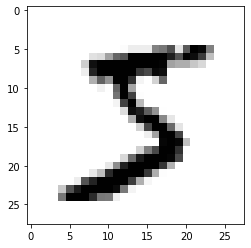

In [3]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [4]:
x_train = x_train/255
x_test = x_test/255
x_train = np.expand_dims(x_train,axis=-1)
x_test = np.expand_dims(x_test,axis=-1)
x_train.shape

(60000, 28, 28, 1)

In [5]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), strides=1,activation='relu',input_shape=(28, 28,1)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', strides=1))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.fit(x_train, y_train, epochs=3)

Train on 60000 samples
Epoch 1/3
45792/60000 [=====================>........] - ETA: 20s - loss: 0.1279 - accuracy: 0.9609

KeyboardInterrupt: 

In [ ]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

In [ ]:
print("Predicted digits: ")
predictions = model.predict(x_test[:20])
print(np.argmax(predictions, axis = 1))
print("Original digits: ")
print(y_test[:20])

In [ ]:
for i in range(0,20):
    plt.imshow(x_test[i].reshape(28,28),cmap=plt.cm.binary)
    plt.show()